### Шаг 1. Подготовка данных к анализу

In [1]:
#from pymystem3 import Mystem
#m = Mystem()
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats as st
import random

In [2]:
visits_df = pd.read_csv('visits_log.csv')
visits_df.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits_df['Device'].unique()

array(['touch', 'desktop'], dtype=object)

In [5]:
orders_df = pd.read_csv('orders_log.csv')
orders_df.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
costs_df = pd.read_csv('costs.csv')
costs_df.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [8]:
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Приведем даты в таблицах к правильному типу

In [9]:
visits_df['End Ts'] = pd.to_datetime(visits_df['End Ts'])

In [10]:
visits_df['Start Ts'] = pd.to_datetime(visits_df['Start Ts'])

In [11]:
visits_df.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [12]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [13]:
orders_df['Buy Ts'] = pd.to_datetime(orders_df['Buy Ts'])

In [14]:
costs_df['dt'] = pd.to_datetime(costs_df['dt'])

In [15]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [16]:
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [17]:
visits_df['Start Ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: Start Ts, dtype: object

In [18]:
visits_names = ['Device', 'End_session', 'Source_id', 'Start_session', 'Uid']
orders_names = ['Buy_date', 'Revenue', 'Uid']
costs_names = ['source_id', 'date', 'costs']

In [19]:
visits_df.set_axis(visits_names, axis = 'columns',inplace = True)
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [20]:
orders_df.set_axis(orders_names, axis = 'columns',inplace = True)
orders_df.head()

,Buy_date,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [21]:
costs_df.set_axis(costs_names, axis = 'columns',inplace = True)
costs_df.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [22]:
orders_df['Revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

Первая аномалия: видим единовременную выручку на огромную по меркам сайта сумму - 2633. 

In [23]:
orders_df[orders_df['Revenue'] < 1000].count()

Buy_date    50408
Revenue     50408
Uid         50408
dtype: int64

In [24]:
orders_df.sort_values(by='Revenue', ascending=False).head(10)

,Buy_date,Revenue,Uid
23244,2017-12-10 20:17:00,2633.28,5539673724080479777
36522,2018-02-23 08:54:00,1236.28,11149926373378902217
36682,2018-02-24 09:25:00,1221.37,11149926373378902217
23165,2017-12-10 13:04:00,1195.64,5539673724080479777
24607,2017-12-17 18:06:00,1109.10,11149926373378902217
47507,2018-05-16 19:53:00,1080.44,11149926373378902217
40386,2018-03-18 09:13:00,1073.11,11149926373378902217
45653,2018-04-26 20:06:00,948.44,11149926373378902217
40020,2018-03-15 19:22:00,856.78,11149926373378902217
40643,2018-03-19 18:15:00,685.67,11149926373378902217


2633 - вдвое выше следующей по величине выручки. Запомним. А еще в этот день - 10.12.2017 - сразу два заказа попали в топ-5, оба принесли выручку более 1000.

In [25]:
costs_df['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

In [26]:
costs_df.sort_values(by='costs', ascending=False).head(10)

,source_id,date,costs
902,3,2017-11-24,1788.28
919,3,2017-12-11,1061.18
1005,3,2018-03-07,996.15
853,3,2017-10-06,980.52
936,3,2017-12-28,858.28
975,3,2018-02-05,845.75
942,3,2018-01-03,844.63
905,3,2017-11-27,831.73
874,3,2017-10-27,824.66
979,3,2018-02-09,822.49


Здесь тоже есть несоразмерно большая сумма - на этот раз затрат на рекламу. 24.11.2017 было потрачено почти 2000 (кстати, чего? допустим, рублей), почти вдвое больше следующей по размеру суммы.

In [27]:
visits_df['duration'] = (visits_df['End_session'] - visits_df['Start_session']).dt.seconds
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0


In [28]:
visits_df['duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration, dtype: float64

In [29]:
orders_df['Revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

In [30]:
costs_df['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

Данные готовы к дальнейшему изучению.

### Шаг 2. Отчёты и метрики

In [31]:
visits_df['month'] = visits_df['Start_session'].dt.strftime('%Y-%m')
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12


In [32]:
visits_df.groupby(['month']).agg({'Uid': 'nunique'})


,Uid
month,
2017-06,13259
2017-07,14183
2017-08,11631
2017-09,18975
2017-10,29692
2017-11,32797
2017-12,31557
2018-01,28716
2018-02,28749


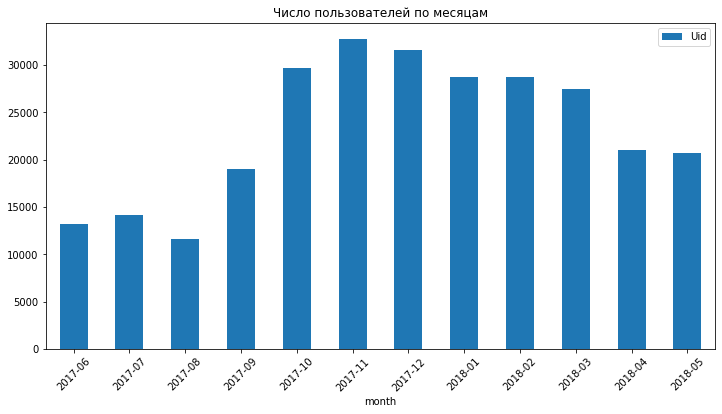

In [33]:
visits_df.groupby(['month']).agg({'Uid': 'nunique'}).plot(kind='bar', rot=45, figsize=(12,6), title = 'Число пользователей по месяцам')

Можно выделить три периода: с июня по сентябрь 2017 года сервисом ежемесячно пользовалось не более 20 000 уникальных пользователей (но и не менее 10 000). Затем с октября 2017 по март 2018 включительно это число резко выросло и приблизилось к 30 000. Интересно будет сопоставить расходы на рекламу по этим периодам. В апреле-мае 2018 года число пользователей стабилизировалось на отметке 20 000 уникальных пользователей.

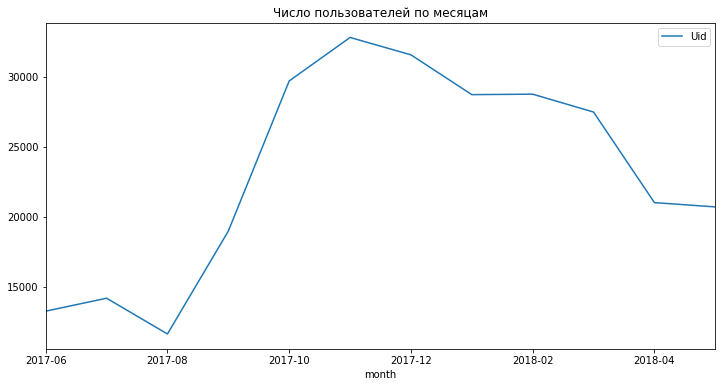

In [34]:
visits_df.groupby(['month']).agg({'Uid': 'nunique'}).plot(figsize=(12,6), title = 'Число пользователей по месяцам')

Столбцы выглядят более информативными, но оставим график в качестве эксперимента.

In [35]:
visits_df['week'] = visits_df['Start_session'].dt.strftime('%Y-%W')
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12,2017-51
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02,2018-08
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07,2017-26
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05,2018-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12,2017-52


In [36]:
visits_df.groupby(['week']).agg({'Uid': 'nunique'}).head()

,Uid
week,
2017-22,2021
2017-23,4129
2017-24,2812
2017-25,2878
2017-26,3064


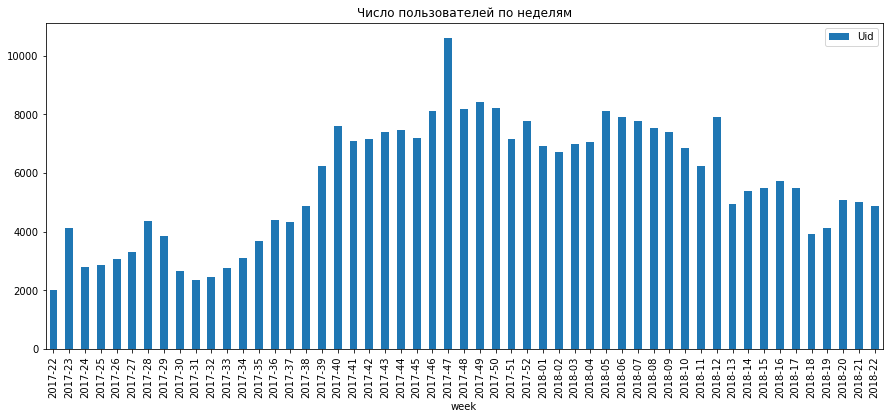

In [37]:
visits_df.groupby(['week']).agg({'Uid': 'nunique'}).plot(kind='bar', figsize=(15,6), title = 'Число пользователей по неделям')

Понедельная разбивка не так однозначна, хотя временные спады в 2-3 недели сменяются уверенным ростом. В целом картина такая же.

In [38]:
visits_df.groupby(['week']).agg({'Uid': 'nunique'})['Uid'].mean()

5716.245283018868

In [39]:
visits_df.groupby(['month']).agg({'Uid': 'nunique'})['Uid'].mean()

23228.416666666668

В среднем каждую неделю на сайт заходит 5716 уникальных посетителей, в месяц - 23228.

In [40]:
visits_df['day'] = visits_df['Start_session'].dt.strftime('%Y-%m-%d')
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12,2017-51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02,2018-08,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07,2017-26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05,2018-20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12,2017-52,2017-12-27


In [41]:
visits_df.groupby(['day']).agg({'Uid': 'nunique'})['Uid'].mean()

907.9917582417582

В день сайт посещает в среднем менее тысячи человек.

In [42]:
visits_df['duration'].mean()

643.506488592098

In [43]:
visits_df['duration'].mean()/60

10.725108143201632

Средняя сессия на сайте длится 643 с, или чуть больше 10 минут. 

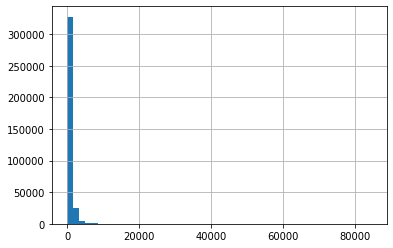

In [44]:
visits_df['duration'].hist(bins=50)

Похоже, в нашем случае среднюю продолжительность сессии лучше отобразит мода.

In [45]:
visits_df['duration'].mode()

0    60
dtype: int64

Всего минута вместо 10. Негусто.


In [46]:
visits_per_user = visits_df.groupby(['day']).agg({'Uid': ['count','nunique']})
visits_per_user.head()

Uid        
           count nunique
day                     
2017-06-01   664     605
2017-06-02   658     608
2017-06-03   477     445
2017-06-04   510     476
2017-06-05   893     820

In [47]:
visits_per_user.columns = ['n_sessions', 'n_users']
visits_per_user.head()

,n_sessions,n_users
day,,
2017-06-01,664,605
2017-06-02,658,608
2017-06-03,477,445
2017-06-04,510,476
2017-06-05,893,820


In [48]:
visits_per_user['visits_per_user'] = visits_per_user['n_sessions'] / visits_per_user['n_users']
visits_per_user.head()

,n_sessions,n_users,visits_per_user
day,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [49]:
visits_per_user['visits_per_user'].mean()

1.0821696440039723

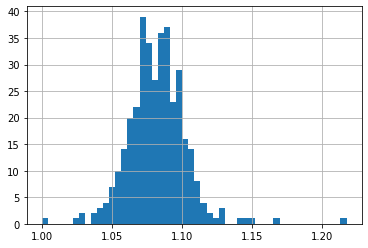

In [50]:
visits_per_user['visits_per_user'].hist(bins=50)

В среднем один пользователь заходит на сайт раз в день.

In [51]:
first_activity_date = visits_df.groupby(['Uid'])['Start_session'].min()
first_activity_date.name = 'first_activity_date'
visits_df = visits_df.join(first_activity_date, on='Uid')
visits_df['first_activity_date'] = visits_df['first_activity_date'].dt.strftime('%Y-%m-%d')
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12,2017-51,2017-12-20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02,2018-08,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07,2017-26,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05,2018-20,2018-05-20,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12,2017-52,2017-12-27,2017-12-27


In [52]:
visits_df['day'] = pd.to_datetime(visits_df['day'])
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12,2017-51,2017-12-20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02,2018-08,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07,2017-26,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05,2018-20,2018-05-20,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12,2017-52,2017-12-27,2017-12-27


In [53]:
visits_df['first_activity_date'] = pd.to_datetime(visits_df['first_activity_date'])
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12,2017-51,2017-12-20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02,2018-08,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07,2017-26,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05,2018-20,2018-05-20,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12,2017-52,2017-12-27,2017-12-27


In [54]:
visits_df['active_month'] = visits_df['day'].astype('datetime64[M]')
visits_df['first_active_month'] = visits_df['first_activity_date'].astype('datetime64[M]')
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day,first_activity_date,active_month,first_active_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12,2017-51,2017-12-20,2017-12-20,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02,2018-08,2018-02-19,2018-02-19,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07,2017-26,2017-07-01,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05,2018-20,2018-05-20,2018-03-09,2018-05-01,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12,2017-52,2017-12-27,2017-12-27,2017-12-01,2017-12-01


In [55]:
cohorts = visits_df.pivot_table(index='first_active_month',
                               columns='active_month',
                               values='Uid',
                               aggfunc='nunique')
cohorts

active_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_active_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


In [56]:
visits_df.reset_index()
visits_df['lifetime'] = visits_df['active_month'] - visits_df['first_active_month']
visits_df['lifetime'].head()

0    0 days
1    0 days
2    0 days
3   61 days
4    0 days
Name: lifetime, dtype: timedelta64[ns]

In [57]:
visits_df['lifetime'] = visits_df['lifetime'] / np.timedelta64(1,'M')
visits_df['lifetime'].head()

0    0.000000
1    0.000000
2    0.000000
3    2.004148
4    0.000000
Name: lifetime, dtype: float64

In [58]:
visits_df['lifetime'] = visits_df['lifetime'].round().astype('int')
visits_df['lifetime'].head(10)

0    0
1    0
2    0
3    2
4    0
5    0
6    7
7    0
8    0
9    0
Name: lifetime, dtype: int32

In [59]:
visits_df['active_month'] = visits_df['active_month'].dt.strftime('%Y-%m')
visits_df['first_active_month'] = visits_df['first_active_month'].dt.strftime('%Y-%m')
cohorts = visits_df.pivot_table(index='first_active_month',
                               columns='active_month',
                               values='Uid',
                               aggfunc='nunique')
cohorts

active_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
first_active_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


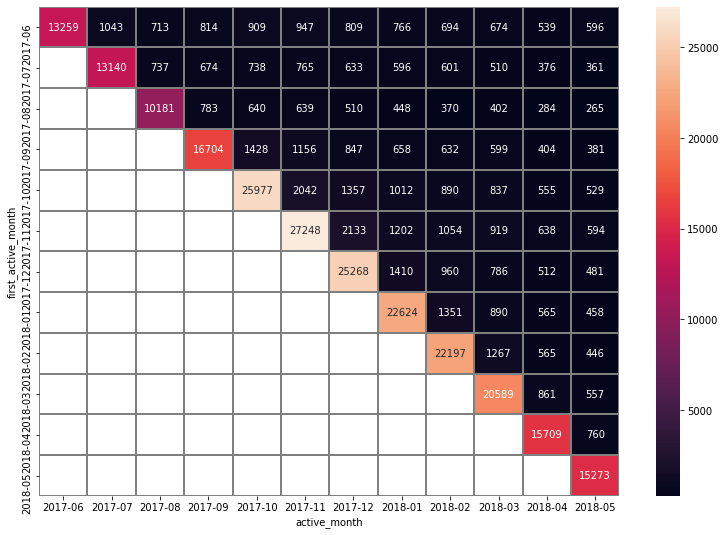

In [60]:
plt.figure(figsize=(13, 9))
#plt.title('')

sns.heatmap(cohorts, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Каждый месяц на сайт приходит свыше 10 000 новых пользователей, в половине случаев - свыше 20 000. Уже на второй месяц из них на сайт возвращается минимум в 10 раз меньше пользователей. Все когорты демонстрируют тенденцию к уверенному дальнейшему снижению числа пользователе, причем чем больше их было изначально, тем стремительнее падение - и от когорт с изначальным числом пользователей 10-20 000, и от когорт с изначальным числом пользователей 20-27 000 спустя считанные месяцы остается порядка 500 человек. Самая грустная когорта - за август 2017 года; самая малочисленная изначально (10 181 человек), она стабильна снижалась на всем протяжении рассматриваемого периода и сократилась до 265 человек - антирекорд по обоим показателям. Самая же изначально многочисленная когорта возникла в ноябре 2017 (это объяснимо высокими затратами на маркетинг - за октябрь и ноябрь 4 транша попало в топ-10 за весь период). Эта когорта собрала 27 248 человек, из которых полгода спустя осталось 594, что даже меньше, чем июньской когорте.

In [61]:
cohorts_lifetime = visits_df.groupby(['first_active_month', 'lifetime']).agg({'Uid':'nunique'}).reset_index()

In [62]:
initial_users_count = cohorts_lifetime[cohorts_lifetime['lifetime'] == 0][['first_active_month','Uid']]
initial_users_count

,first_active_month,Uid
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977
50,2017-11,27248
57,2017-12,25268
63,2018-01,22624
68,2018-02,22197
72,2018-03,20589


In [63]:
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})
cohorts_lifetime = cohorts_lifetime.merge(initial_users_count,on='first_active_month')
cohorts_lifetime['retention'] = cohorts_lifetime['Uid']/cohorts_lifetime['cohort_users']
cohorts_lifetime.head()

,first_active_month,lifetime,Uid,cohort_users,retention
0,2017-06,0,13259,13259,1.000000
1,2017-06,1,1043,13259,0.078664
2,2017-06,2,713,13259,0.053775
3,2017-06,3,814,13259,0.061392
4,2017-06,4,909,13259,0.068557


In [64]:
retention_pivot = cohorts_lifetime.pivot_table(index='first_active_month',columns='lifetime',values='retention',aggfunc='sum')

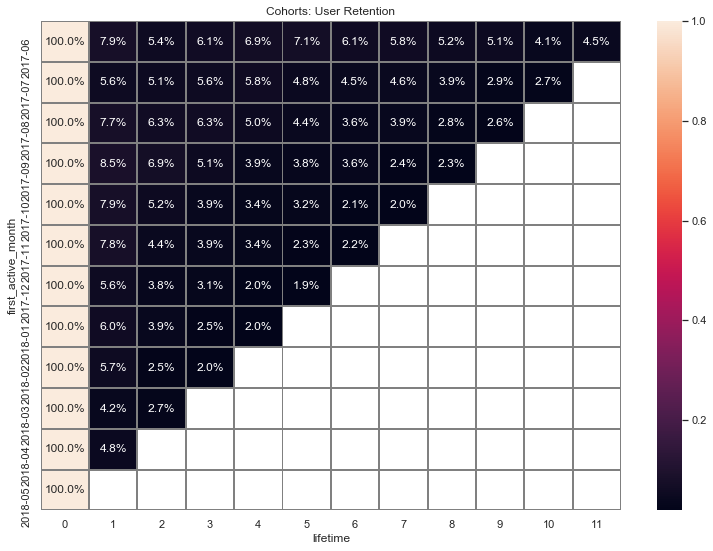

In [65]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Озвученные выше тенденции проиллюстрированы более наглядно. В первый же месяц каждая когорта теряет минимум 90% пользователей. Спустя полгода их остается в лучшем случае 6%, причем начиная с lifetime=4 Retention Rate снижается с каждой новой когортой. В итоге от изначального набора пользователей остается около 2%. Кроме того, с каждой новой когортой в первый же месяц теряется все больше пользователей (только в августе-сентябре наблюдался скромный рост). 

Чтобы увидеть, спустя какое время люди начинают что-то покупать на сайте, нужно прицепить таблицу orders_df к таблице visits_df по столбцам Uid и дате покупки. Столбец Uid есть и там и там, а вот столбцы с датами называются по-разному. В контексте задачи конкретное время покупки можно проигнорировать, поэтому в столбце 'Buy_date' таблицы orders_df оставим только дату, а сам столбец переименуем.

In [66]:
orders_df['Buy_date'] = orders_df['Buy_date'].dt.strftime('%Y-%m-%d')
orders_df['Buy_date'] = pd.to_datetime(orders_df['Buy_date'])
orders_df.head()

,Buy_date,Revenue,Uid
0,2017-06-01,17.00,10329302124590727494
1,2017-06-01,0.55,11627257723692907447
2,2017-06-01,0.37,17903680561304213844
3,2017-06-01,0.55,16109239769442553005
4,2017-06-01,0.37,14200605875248379450


In [67]:
orders_names = ['day', 'Revenue', 'Uid']
orders_df.set_axis(orders_names, axis = 'columns',inplace = True)
orders_df.head()

,day,Revenue,Uid
0,2017-06-01,17.00,10329302124590727494
1,2017-06-01,0.55,11627257723692907447
2,2017-06-01,0.37,17903680561304213844
3,2017-06-01,0.55,16109239769442553005
4,2017-06-01,0.37,14200605875248379450


До присоединения можно провести пару нехитрых расчетов

In [68]:
orders_df.groupby(['day']).agg({'Uid': 'nunique'})['Uid'].mean()

127.87912087912088

In [69]:
orders_df.groupby(['day']).agg({'Revenue': 'nunique'})['Revenue'].mean()

61.29945054945055

В среднем 127 человек в день делают покупки на сайте на сумму в среднем в 61 (мы договорились, что рубль)

In [70]:
min_order_datetime = orders_df.groupby(['Uid'])['day'].min()
min_order_datetime.name = 'min_order_datetime'
orders_df = orders_df.join(min_order_datetime, on='Uid')
orders_df.head()
#orders_time = pd.merge(visits_df, orders_df, on=['Uid', 'day'])
#orders_time.head()

,day,Revenue,Uid,min_order_datetime
0,2017-06-01,17.00,10329302124590727494,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01


In [71]:
orders_time = pd.merge(visits_df, orders_df, on=['Uid', 'day'])
orders_time.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day,first_activity_date,active_month,first_active_month,lifetime,Revenue,min_order_datetime
0,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,3960,2018-02,2018-07,2018-02-12,2018-02-10,2018-02,2018-02,0,0.73,2018-02-12
1,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,15857957287537270437,720,2018-03,2018-11,2018-03-12,2017-09-22,2018-03,2017-09,6,1.83,2018-03-12
2,touch,2018-03-27 17:52:00,5,2018-03-27 17:32:00,15868686231870595097,1200,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27
3,touch,2018-03-27 19:45:00,1,2018-03-27 19:44:00,15868686231870595097,60,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27
4,touch,2018-03-27 17:26:00,5,2018-03-27 17:01:00,15868686231870595097,1500,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27


In [72]:
orders_time['orders_time'] = orders_time['min_order_datetime'] - orders_time['first_activity_date']
orders_time.head(10)

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day,first_activity_date,active_month,first_active_month,lifetime,Revenue,min_order_datetime,orders_time
0,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,3960,2018-02,2018-07,2018-02-12,2018-02-10,2018-02,2018-02,0,0.73,2018-02-12,2 days
1,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,15857957287537270437,720,2018-03,2018-11,2018-03-12,2017-09-22,2018-03,2017-09,6,1.83,2018-03-12,171 days
2,touch,2018-03-27 17:52:00,5,2018-03-27 17:32:00,15868686231870595097,1200,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27,0 days
3,touch,2018-03-27 19:45:00,1,2018-03-27 19:44:00,15868686231870595097,60,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27,0 days
4,touch,2018-03-27 17:26:00,5,2018-03-27 17:01:00,15868686231870595097,1500,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27,0 days
5,touch,2018-03-27 16:58:00,5,2018-03-27 16:18:00,15868686231870595097,2400,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27,0 days
6,desktop,2017-10-03 10:30:00,1,2017-10-03 10:10:00,18169507838259737849,1200,2017-10,2017-40,2017-10-03,2017-06-15,2017-10,2017-06,4,2.75,2017-09-29,106 days
7,desktop,2018-02-25 23:43:00,5,2018-02-25 23:35:00,9344114199116964256,480,2018-02,2018-08,2018-02-25,2018-02-25,2018-02,2018-02,0,0.98,2018-02-25,0 days
8,desktop,2018-04-19 17:48:00,1,2018-04-19 17:46:00,3577449367987547907,120,2018-04,2018-16,2018-04-19,2017-06-09,2018-04,2017-06,10,5.13,2017-06-09,0 days
9,desktop,2018-01-25 12:40:00,4,2018-01-25 12:31:00,14063997464143962003,540,2018-01,2018-04,2018-01-25,2017-11-25,2018-01,2017-11,2,1.22,2018-01-25,61 days


In [73]:
orders_time.groupby('orders_time')['Uid'].count().head(10)

orders_time
0 days    38404
1 days     2827
2 days     1196
3 days      656
4 days      949
5 days      568
6 days      354
7 days      523
8 days      203
9 days      458
Name: Uid, dtype: int64

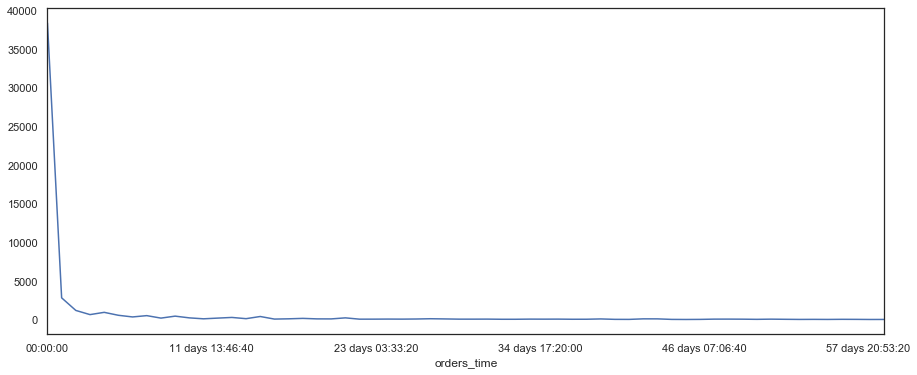

In [74]:
orders_time[orders_time['orders_time'] < '60 days'].groupby('orders_time')['Uid'].count().plot(figsize=(15,6))

Похоже, что пользователи заходят на сайт либо чтобы сразу что-то купить, либо откладывают покупку самое большее на 10 дней.

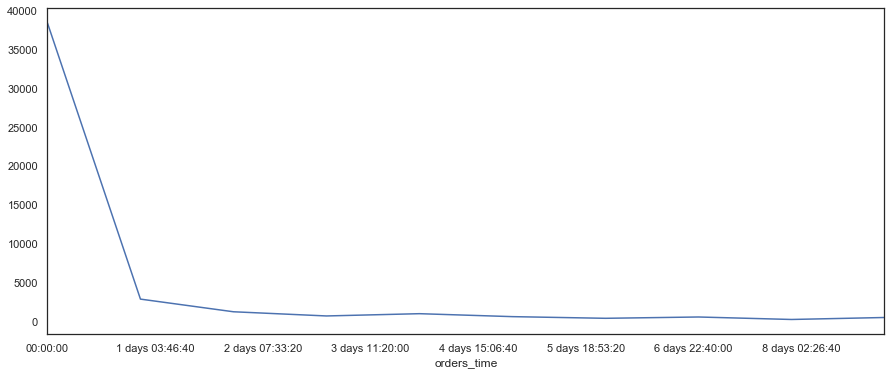

In [75]:
orders_time[orders_time['orders_time'] < '10 days'].groupby('orders_time')['Uid'].count().plot(figsize=(15,6))

Даже на один день мало кто откладывает в общем масштабе. Зашли - сразу или через день-другой что-то купили - и больше не возвращаются. В целом, судя по всему, поведение именно такое. Можно попробовать посмотреть по когортам.

In [76]:
orders_time['min_order_month'] = orders_time['min_order_datetime'].dt.strftime('%Y-%m')

In [77]:
orders_cohorts = orders_time.pivot_table(index='min_order_month',
                               columns='active_month',
                               values='Uid',
                               aggfunc='nunique')
orders_cohorts

active_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
min_order_month,,,,,,,,,,,,
2017-06,1910.0,44.0,33.0,39.0,56.0,50.0,48.0,34.0,42.0,31.0,31.0,36.0
2017-07,NaN,1748.0,33.0,34.0,37.0,38.0,26.0,21.0,19.0,27.0,14.0,16.0
2017-08,NaN,NaN,1225.0,33.0,31.0,24.0,31.0,20.0,16.0,25.0,15.0,25.0
2017-09,NaN,NaN,NaN,2280.0,92.0,61.0,51.0,32.0,40.0,36.0,24.0,27.0
2017-10,NaN,NaN,NaN,NaN,3868.0,130.0,85.0,53.0,51.0,46.0,32.0,42.0
2017-11,NaN,NaN,NaN,NaN,NaN,3571.0,155.0,77.0,73.0,45.0,24.0,39.0
2017-12,NaN,NaN,NaN,NaN,NaN,NaN,3775.0,91.0,64.0,58.0,35.0,42.0
2018-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2904.0,78.0,54.0,32.0,27.0
2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3152.0,72.0,32.0,24.0


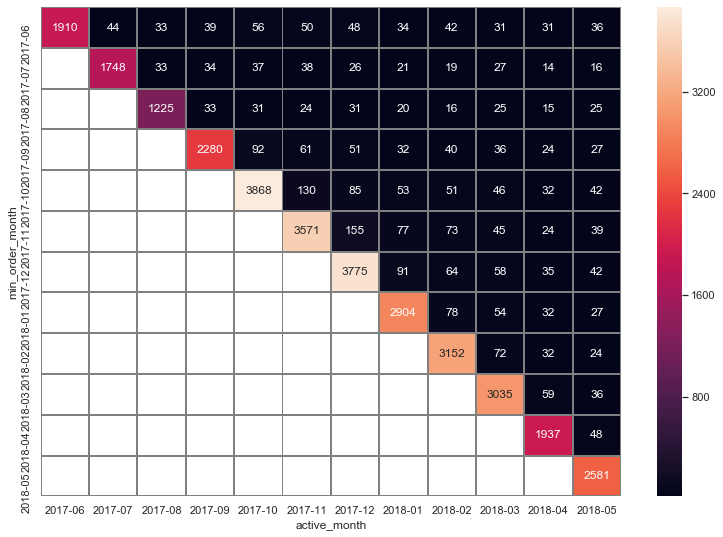

In [78]:
plt.figure(figsize=(13, 9))
#plt.title('')
sns.heatmap(orders_cohorts, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Покупки по когортам демонстрируют расклады, схожие с числом пользователей по когортам: пик приходится на первый месяц для когорт с октября по декабрь, затем спад. Итак, для всех когорт подтверждена общая тенденция, выявленная выше: основной объем покупок приходится на первый месяц и даже первую неделю жизни когорты. Это соответствует и Retention Rate по числу пользователей: каждый месяц на сайт приходит 20-25 тысяч новых юзеров, из них 2000 - 3500 делают покупки в первые два-три дня, а потом большинство из них уходит (кстати, интересно, куда - может быть, в приложение или подписываются на соцсети и делают дальнейшие покупки там). Менее 10 % из каждой когорты остаются постоянными посетителями и покупателями на сайте.

In [79]:
orders_cohorts_lifetime = orders_time.groupby(['first_active_month', 'lifetime']).agg({'Uid':'nunique'}).reset_index()
initial_orders_count = orders_cohorts_lifetime[orders_cohorts_lifetime['lifetime'] == 0][['first_active_month','Uid']]
initial_orders_count

,first_active_month,Uid
0,2017-06,1910
12,2017-07,1639
23,2017-08,1140
33,2017-09,2090
42,2017-10,3501
50,2017-11,3113
57,2017-12,3240
63,2018-01,2463
68,2018-02,2671
72,2018-03,2513


In [80]:
initial_orders_count = initial_orders_count.rename(columns={'Uid':'cohort_users'})
orders_cohorts_lifetime = orders_cohorts_lifetime.merge(initial_orders_count,on='first_active_month')
orders_cohorts_lifetime['retention'] = orders_cohorts_lifetime['Uid']/orders_cohorts_lifetime['cohort_users']
orders_cohorts_lifetime.head()

,first_active_month,lifetime,Uid,cohort_users,retention
0,2017-06,0,1910,1910,1.000000
1,2017-06,1,153,1910,0.080105
2,2017-06,2,74,1910,0.038743
3,2017-06,3,115,1910,0.060209
4,2017-06,4,161,1910,0.084293


In [81]:
orders_retention_pivot = orders_cohorts_lifetime.pivot_table(index='first_active_month',columns='lifetime',values='retention',aggfunc='sum')
orders_retention_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_active_month,,,,,,,,,,,,
2017-06,1.0,0.080105,0.038743,0.060209,0.084293,0.075393,0.068063,0.052880,0.059162,0.055497,0.037696,0.057068
2017-07,1.0,0.046980,0.053691,0.057962,0.061013,0.049420,0.044539,0.050031,0.043929,0.028066,0.029896,NaN
2017-08,1.0,0.081579,0.074561,0.065789,0.062281,0.038596,0.035965,0.046491,0.031579,0.035088,NaN,NaN
2017-09,1.0,0.115789,0.074641,0.059809,0.030622,0.043062,0.036364,0.017225,0.026794,NaN,NaN,NaN
2017-10,1.0,0.081691,0.050557,0.035704,0.033705,0.031134,0.018280,0.018852,NaN,NaN,NaN,NaN
2017-11,1.0,0.111468,0.053004,0.039833,0.037263,0.019916,0.026020,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.060802,0.036728,0.031481,0.016667,0.023148,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.071864,0.044255,0.020300,0.021112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.064770,0.020217,0.022838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
orders_retention_pivot_second = orders_cohorts_lifetime[orders_cohorts_lifetime['lifetime'] > 0].pivot_table(index='first_active_month',columns='lifetime',values='retention',aggfunc='sum')

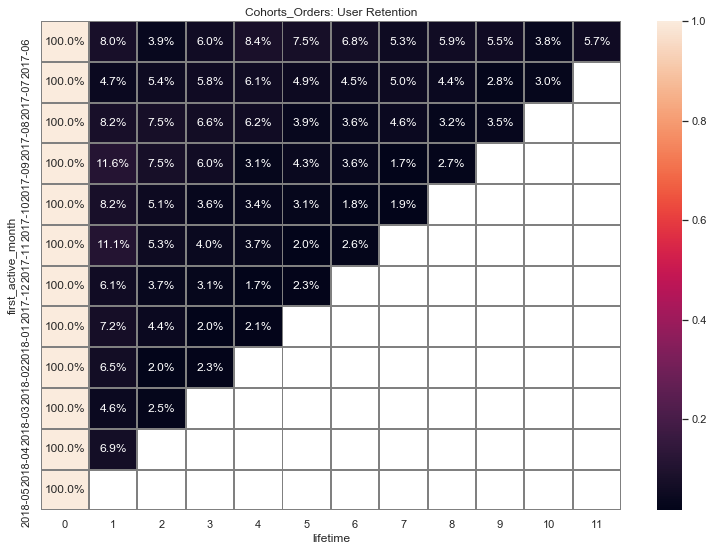

In [83]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts_Orders: User Retention')
sns.heatmap(orders_retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Только в двух когортах более 10% от изначального числа сделавших покупки пользователей что-то купили на второй месяц lifetime. Только в одной - самой первой - на всем протяжении lifetime доля продолжающих делать покупки юзеров достаточно стабильно держится на уровне выше 5% от изначального числа. В целом же очень быстро эта доля слетает до двух процентов - и чем дальше, тем быстрее. Для наглядности уберем нулевой столбец.

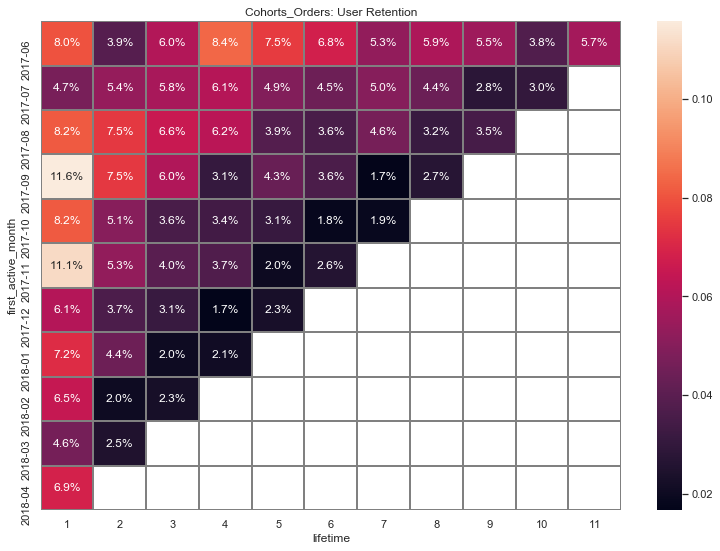

In [84]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts_Orders: User Retention')
sns.heatmap(orders_retention_pivot_second, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [85]:
orders_time.groupby(['week']).agg({'Uid': 'nunique'})['Uid'].mean()

685.0

In [86]:
orders_time.groupby(['month']).agg({'Uid': 'nunique'})['Uid'].mean()

2906.8333333333335

In [87]:
orders_time.groupby(['day']).agg({'Uid': 'nunique'})['Uid'].mean()

105.18457300275482

В среднем ежедневно совершается 105 покупок, еженедельно - 685, ежемесячно - 2906.

In [88]:
orders_time.groupby(['month']).agg({'Revenue': 'nunique'})['Revenue'].mean()

311.4166666666667

In [89]:
orders_time.groupby(['week']).agg({'Revenue': 'nunique'})['Revenue'].mean()

153.77358490566039

In [90]:
orders_time.groupby(['day']).agg({'Revenue': 'nunique'})['Revenue'].mean()

54.50413223140496

Средняя сумма покупок за день - 54 р, за неделю - 153 р, за месяц - 311 р.

In [91]:
orders_time['Revenue'].mean()

5.234341607908242

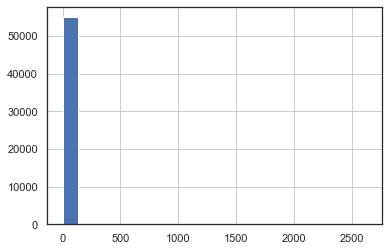

In [92]:
orders_time['Revenue'].hist(bins=20)

In [93]:
orders_time['Revenue'].mode()

0    1.83
dtype: float64

Средний чек за покупку на сайте - 5 рублей (если это рубли). Хотя судя по этому значению, скорее - доллары.

In [94]:
orders_time[orders_time['Revenue'] > 0]['Revenue'].mean()

5.244443938676208

In [95]:
orders_grouped_by_cohorts = orders_time.groupby(['min_order_month','active_month']).agg({'Revenue':'sum','Uid':'nunique'})
orders_grouped_by_cohorts.head()

Revenue   Uid
min_order_month active_month                
2017-06         2017-06       11838.34  1910
                2017-07        1000.45    44
                2017-08        1079.09    33
                2017-09        2614.21    39
                2017-10        2688.00    56

In [96]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['Revenue'] / orders_grouped_by_cohorts['Uid']
orders_grouped_by_cohorts_pivot = orders_grouped_by_cohorts.pivot_table(index='min_order_month',columns='active_month',values='revenue_per_user',aggfunc='mean')

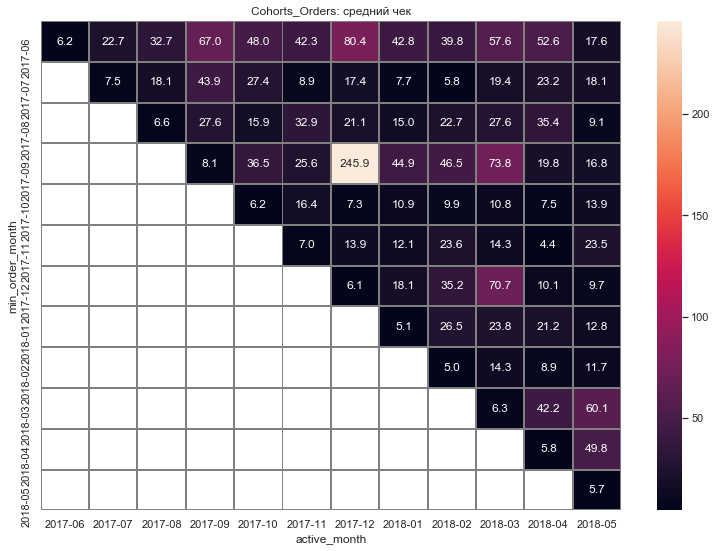

In [97]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts_Orders: средний чек')
sns.heatmap(orders_grouped_by_cohorts_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Так, вот это, кажется, больше похоже на правду. Интересно, что с течением времени практически все когорты демонстрируют рост среднего чека по пользователям. Аномалия декабря 2017 года была высвечена в самом начале, на этапе подготовки данных - мы помним, что 10 декабря было совершено сразу две покупки, одна из которых стала самой крупной за весь временной срез, вторая попала в топ-5. Теперь мы знаем, что эти покупки были совершены представителями сентябрьской когорты. 

Итак: да, с течением времени падает как число пользователей, так и число совершенных ими покупок (особенно чувствительны эти падения в первый же месяц активности), но зато пользователи, оставшиеся активными, постепенно средний чек увеличивают.

Теперь посмотрим, сколько денег принесли покупатели по когортам

In [98]:
orders_time.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day,first_activity_date,active_month,first_active_month,lifetime,Revenue,min_order_datetime,orders_time,min_order_month
0,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,3960,2018-02,2018-07,2018-02-12,2018-02-10,2018-02,2018-02,0,0.73,2018-02-12,2 days,2018-02
1,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,15857957287537270437,720,2018-03,2018-11,2018-03-12,2017-09-22,2018-03,2017-09,6,1.83,2018-03-12,171 days,2018-03
2,touch,2018-03-27 17:52:00,5,2018-03-27 17:32:00,15868686231870595097,1200,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27,0 days,2018-03
3,touch,2018-03-27 19:45:00,1,2018-03-27 19:44:00,15868686231870595097,60,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27,0 days,2018-03
4,touch,2018-03-27 17:26:00,5,2018-03-27 17:01:00,15868686231870595097,1500,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27,0 days,2018-03


In [99]:
cohort_sizes = orders_time.groupby('min_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['min_order_month', 'n_buyers']
cohort_sizes

,min_order_month,n_buyers
0,2017-06,1926
1,2017-07,1772
2,2017-08,1250
3,2017-09,2321
4,2017-10,3915
5,2017-11,3620
6,2017-12,3812
7,2018-01,2942
8,2018-02,3170
9,2018-03,3048


In [100]:
cohorts_ltv = orders_time.groupby(['min_order_month','active_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts_ltv

,min_order_month,active_month,Revenue
0,2017-06,2017-06,11838.34
1,2017-06,2017-07,1000.45
2,2017-06,2017-08,1079.09
3,2017-06,2017-09,2614.21
4,2017-06,2017-10,2688.00
...,...,...,...
73,2018-03,2018-04,2490.48
74,2018-03,2018-05,2162.58
75,2018-04,2018-04,11228.91
76,2018-04,2018-05,2388.67


In [101]:
report = pd.merge(cohort_sizes, cohorts_ltv, on='min_order_month')
report.head()

,min_order_month,n_buyers,active_month,Revenue
0,2017-06,1926,2017-06,11838.34
1,2017-06,1926,2017-07,1000.45
2,2017-06,1926,2017-08,1079.09
3,2017-06,1926,2017-09,2614.21
4,2017-06,1926,2017-10,2688.00


In [102]:
report['active_month'] = pd.to_datetime(report['active_month'])
report['min_order_month'] = pd.to_datetime(report['min_order_month'])
report['age'] = (report['active_month'] - report['min_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,min_order_month,n_buyers,active_month,Revenue,age
0,2017-06-01,1926,2017-06-01,11838.34,0
1,2017-06-01,1926,2017-07-01,1000.45,1
2,2017-06-01,1926,2017-08-01,1079.09,2
3,2017-06-01,1926,2017-09-01,2614.21,3
4,2017-06-01,1926,2017-10-01,2688.00,4


In [103]:
report['ltv'] = report['Revenue'] / report['n_buyers']

In [104]:
report['active_month'] = report['active_month'].dt.strftime('%Y-%m')
report['min_order_month'] = report['min_order_month'].dt.strftime('%Y-%m')

In [105]:
output = report.pivot_table(
        index='min_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
output

age,0,1,2,3,4,5,6,7,8,9,10,11
min_order_month,,,,,,,,,,,,
2017-06,6.15,0.52,0.56,1.36,1.40,1.10,2.00,0.76,0.87,0.93,0.85,0.33
2017-07,7.43,0.34,0.84,0.57,0.19,0.26,0.09,0.06,0.30,0.18,0.16,NaN
2017-08,6.44,0.73,0.39,0.63,0.52,0.24,0.29,0.55,0.42,0.18,NaN,NaN
2017-09,7.98,1.45,0.67,5.40,0.62,0.80,1.14,0.20,0.20,NaN,NaN,NaN
2017-10,6.17,0.54,0.16,0.15,0.13,0.13,0.06,0.15,NaN,NaN,NaN,NaN
2017-11,6.95,0.59,0.26,0.48,0.18,0.03,0.25,NaN,NaN,NaN,NaN,NaN
2017-12,6.00,0.43,0.59,1.08,0.09,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,5.02,0.70,0.44,0.23,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.98,0.33,0.09,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
output_ltv = output.cumsum(axis=1).round(2)
output_ltv

age,0,1,2,3,4,5,6,7,8,9,10,11
min_order_month,,,,,,,,,,,,
2017-06,6.15,6.67,7.23,8.59,9.99,11.09,13.09,13.85,14.72,15.65,16.50,16.83
2017-07,7.43,7.77,8.61,9.18,9.37,9.63,9.72,9.78,10.08,10.26,10.42,NaN
2017-08,6.44,7.17,7.56,8.19,8.71,8.95,9.24,9.79,10.21,10.39,NaN,NaN
2017-09,7.98,9.43,10.10,15.50,16.12,16.92,18.06,18.26,18.46,NaN,NaN,NaN
2017-10,6.17,6.71,6.87,7.02,7.15,7.28,7.34,7.49,NaN,NaN,NaN,NaN
2017-11,6.95,7.54,7.80,8.28,8.46,8.49,8.74,NaN,NaN,NaN,NaN,NaN
2017-12,6.00,6.43,7.02,8.10,8.19,8.30,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,5.02,5.72,6.16,6.39,6.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.98,5.31,5.40,5.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


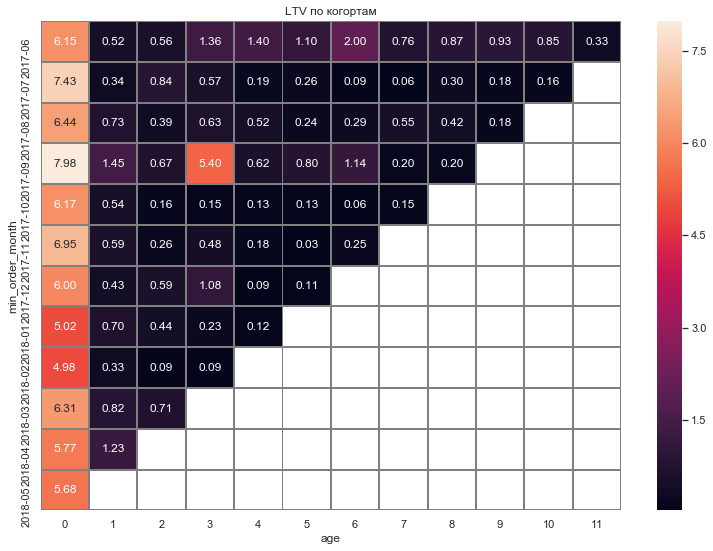

In [107]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV по когортам')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Довольно скромные поступления получаются. Посчитаем общую сумму по каждой когорте.

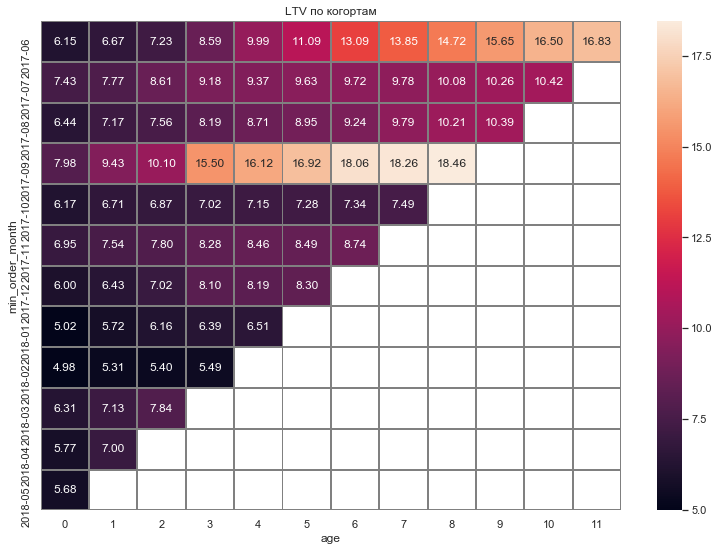

In [108]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV по когортам')
sns.heatmap(output_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Для аккумулированных значений тепловая карта выглядит нагляднее. Здесь одним графиком, полученным из всего одного расчета, подробнее можно изучить данные, полученные чуть ниже с помощью barplot. 

In [109]:
report.groupby('min_order_month')['ltv'].sum()

min_order_month
2017-06    16.809019
2017-07    10.426354
2017-08    10.410848
2017-09    18.469474
2017-10     7.484572
2017-11     8.738790
2017-12     8.302909
2018-01     6.510517
2018-02     5.487722
2018-03     7.833576
2018-04     6.997729
2018-05     5.684975
Name: ltv, dtype: float64

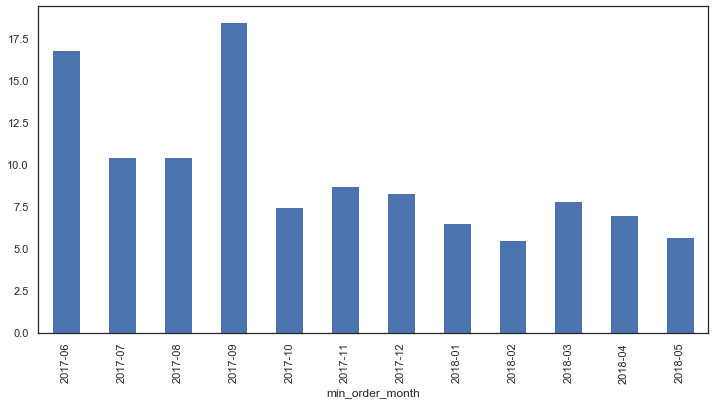

In [110]:
report.groupby('min_order_month')['ltv'].sum().plot(kind='bar', figsize=(12,6))

Любопытная деталь: сентябрьская когорта принесла в сумме больше денег, чем июньская. Впрочем, объяснение этому факту уже было выше: двое представителей этой когорты в декабре 2017 года совершили довольно крупные покупки. В целом же суммарный доход снижается с каждой новой когортой (что логично), но при этом февральскую когорту можно смело признать самой непродуктивной. Это может быть объяснено длительностью самого месяца.

In [111]:
costs_df.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [112]:
costs_df['costs'].sum()

329131.62

Всего на рекламные расходы было потрачено 329 131 р

In [113]:
costs_df.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

Разбивка по рекламным источникам: больше всего - 141 321 р - было потрачено на источник 3. Меньше всего - на источник 9.

In [114]:
costs_df['ad_month'] = costs_df['date'].dt.strftime('%Y-%m')
costs_df.head()

,source_id,date,costs,ad_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [115]:
costs_df.groupby('ad_month')['costs'].sum()

ad_month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Name: costs, dtype: float64

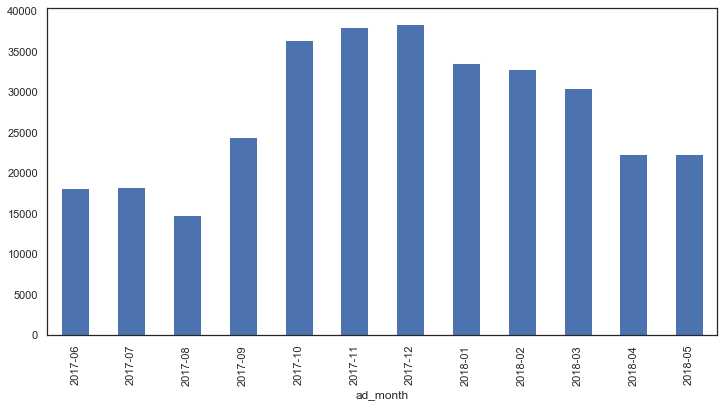

In [116]:
costs_df.groupby('ad_month')['costs'].sum().plot(kind='bar', figsize=(12,6))

Самые высокие траты на рекламу наблюдались в ноябре и декабре 2017 года, самые низкие - в августе 2017 года. Это способствовало формированию самой малочисленной когорты, которая совершила меньше всего покупок в первый месяц существования. 

Text(0, 0.5, '')

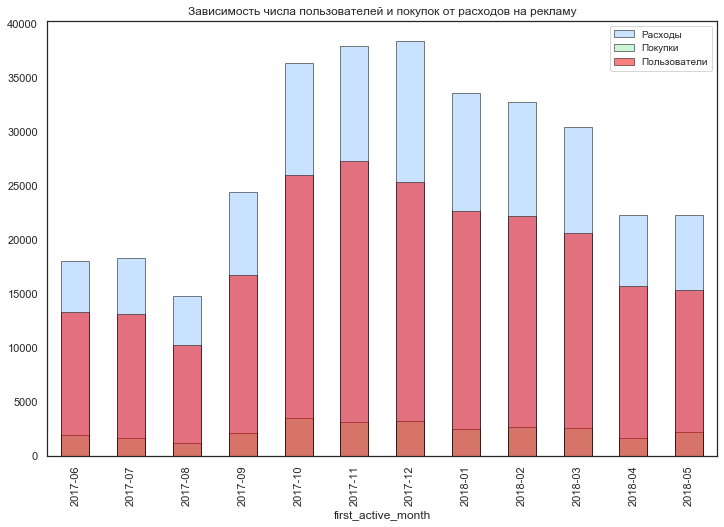

In [117]:
ax = plt.gca()
title = 'Зависимость числа пользователей и покупок от расходов на рекламу'
costs_df.groupby('ad_month')['costs'].sum().plot(kind='bar', figsize=(12,8), 
                                                                    ec='black', ax=ax, color='#92c6ff', x='ad_month',
                                                                    title=title, alpha=0.5)
initial_orders_count.plot(kind='bar', figsize=(12,8), 
                                                                    ec='black', ax=ax, color='#97F0AA', x='first_active_month',
                                                                    title=title, alpha=0.5)
initial_users_count.plot(kind='bar', figsize=(12,8), 
                                                                    ec='black', ax=ax, color='#FF0000', x='first_active_month',
                                                                    title=title, alpha=0.5)

plt.legend(['Расходы', 'Покупки', 'Пользователи'], prop={'size':10})
ax.set_ylabel('')

Наблюдаем ярко выраженную зависимость между суммами расходов на рекламу, количеством привлеченных пользователей и суммами покупок в каждом месяце, кроме ноября 2017 и января 2018. Простой вывод - чем больше расходы на рекламу, тем больше выручка.

In [118]:
monthly_costs = costs_df.groupby('ad_month')['costs'].sum()
report_new = pd.merge(report, monthly_costs, left_on='min_order_month', right_on='ad_month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,min_order_month,n_buyers,active_month,Revenue,age,ltv,costs,cac
0,2017-06,1926,2017-06,11838.34,0,6.146594,18015.0,9.353583
1,2017-06,1926,2017-07,1000.45,1,0.519444,18015.0,9.353583
2,2017-06,1926,2017-08,1079.09,2,0.560275,18015.0,9.353583
3,2017-06,1926,2017-09,2614.21,3,1.357326,18015.0,9.353583
4,2017-06,1926,2017-10,2688.00,4,1.395639,18015.0,9.353583


In [119]:
report_new.groupby('min_order_month')['cac'].mean()

min_order_month
2017-06     9.353583
2017-07    10.293787
2017-08    11.832432
2017-09    10.499315
2017-10     9.277875
2017-11    10.471790
2017-12    10.051246
2018-01    11.393107
2018-02    10.322722
2018-03     9.978763
2018-04    11.453947
2018-05     8.610721
Name: cac, dtype: float64

In [120]:
report_new['cac'].mean()

10.33124526388011

Средняя стоимость привлечения одного покупателя безотносительно к источнику за рассматриваемый период составила 10.33 р. По месяцам распределение выглядит так:

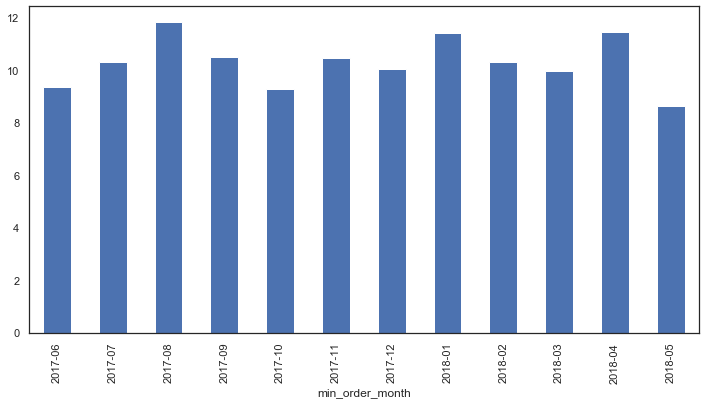

In [121]:
report_new.groupby('min_order_month')['cac'].mean().plot(kind='bar', figsize=(12,6))

Дороже всего новые покупатели обходились в августе 2017, а также январе и апреле 2018. Майская когорта охотнее других вовлеклась в процесс покупок.

In [122]:
sources = costs_df['source_id'].unique()
sources

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

In [123]:
costs_df.head()

,source_id,date,costs,ad_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [124]:
costs_df.set_axis(['source_id', 'date', 'costs', 'order_month'], axis = 'columns',inplace = True)
costs_df.head()

,source_id,date,costs,order_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [125]:
orders_df.head()

,day,Revenue,Uid,min_order_datetime
0,2017-06-01,17.00,10329302124590727494,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01


In [126]:
orders_df['first_order_month'] = orders_df['min_order_datetime'].dt.strftime('%Y-%m')
orders_df['order_month'] = orders_df['day'].dt.strftime('%Y-%m')
orders_df.head()

,day,Revenue,Uid,min_order_datetime,first_order_month,order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06,2017-06
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06,2017-06
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06,2017-06
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06,2017-06
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06,2017-06


In [127]:
def cac_source(source):
    print('Код источника ', source)
    orders_df['first_order_month'] = pd.to_datetime(orders_df['first_order_month'])
    orders_df['order_month'] = pd.to_datetime(orders_df['order_month'])
    costs_df['order_month'] = pd.to_datetime(costs_df['order_month'])
    
    cohort_sizes = orders_df.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
    cohort_sizes.columns = ['first_order_month', 'n_buyers']
    cohorts = orders_df.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
    
    report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
    report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['Revenue'] / report['n_buyers']
    
    #output = report.pivot_table(
    #    index='first_order_month', 
    #    columns='age', 
    #    values='ltv', 
    #    aggfunc='mean').round()
    
    
    monthly_costs = costs_df[costs_df['source_id'] == source].groupby('order_month').sum()
    report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='order_month')
    report_new['cac'] = report_new['costs'] / report_new['n_buyers']
    report_new['romi'] = (report_new['ltv'] / report_new['cac'])
    report_new['romi'] = report_new['romi'].round(2)
    
    output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
    print(output.cumsum(axis=1).mean(axis=0))
    output.cumsum(axis=1).mean(axis=0).plot(figsize=(12,6))
    plt.legend(sources, prop={'size':10})

Код источника  1
age
0      8.597500
1      9.299091
2     10.047000
3     11.466667
4     12.548750
5     13.834286
6     14.388333
7     15.636000
8     17.070000
9     15.600000
10    17.965000
11    21.360000
dtype: float64
Код источника  2
age
0     4.191667
1     4.480909
2     4.877000
3     5.582222
4     6.101250
5     6.678571
6     6.958333
7     7.598000
8     8.315000
9     7.463333
10    8.295000
11    9.880000
dtype: float64
Код источника  3
age
0     1.269167
1     1.366364
2     1.479000
3     1.692222
4     1.842500
5     2.030000
6     2.118333
7     2.306000
8     2.522500
9     2.286667
10    2.575000
11    3.110000
dtype: float64
Код источника  4
age
0     2.887500
1     3.107273
2     3.379000
3     3.838889
4     4.142500
5     4.505714
6     4.731667
7     4.866000
8     5.162500
9     4.823333
10    5.635000
11    6.840000
dtype: float64
Код источника  5
age
0     3.450833
1     3.735455
2     4.055000
3     4.606667
4     5.015000
5     5.522857
6     5.75000

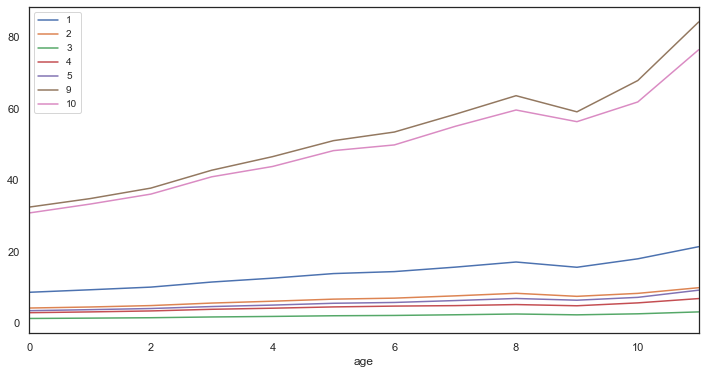

In [128]:
for source in sources:
    cac_source(source)

Судя по всему, если расчеты верны, то каждый привлеченный покупатель окупился моментально. В целом это похоже на зафиксированное выше поведение покупателей: люди сразу, в первые же дни после регистрации, совершают покупки, затем когорта редеет, но в каждой когорте все же остается пусть и маленькая, но доля пользователей, которые продолжают ежемесячно что-то покупать на сайте. 

Тем не менее, источники 9 и 10 демонстрируют на порядок бОльшую окупаемость, чем остальные. Хуже всего, хотя и он в среднем окупается в первый же месяц, отрабатывает источник 3. При этом в совокупности рекламные расходы на этот источник составили 141 321 р - более чем вдвое больше, чем на следующий по расходам - источник 4. Четвертый источник тоже отработал крайне скверно, а вот источники 9 и 10 при вложениях в 24 раза меньших по сравнению с источником 3 отработали гораздо лучше. Поэтому совершенно однозначно, что 9 и 10 источники работают очень хорошо, а вот источники 1-5, особенно 3 и 4, требуют внимания. Либо там что-то не так с настройками кампаний и таргетинга, либо, если настройки в порядке - они просто неэффективны и лучше сосредоточиться на 9 и 10, и в меньшей степени на 1 и 2 источниках.

Предыдущие расчеты оставим как опорные. Расчет по источникам - ниже.

In [129]:
costs_df[costs_df['source_id'] == 1].groupby('order_month')['costs'].sum()

order_month
2017-06-01    1125.61
2017-07-01    1072.88
2017-08-01     951.81
2017-09-01    1502.01
2017-10-01    2315.75
2017-11-01    2445.16
2017-12-01    2341.20
2018-01-01    2186.18
2018-02-01    2204.48
2018-03-01    1893.09
2018-04-01    1327.49
2018-05-01    1467.61
Name: costs, dtype: float64

In [130]:
costs_df['order_month'] = costs_df['order_month'].dt.strftime('%Y-%m')

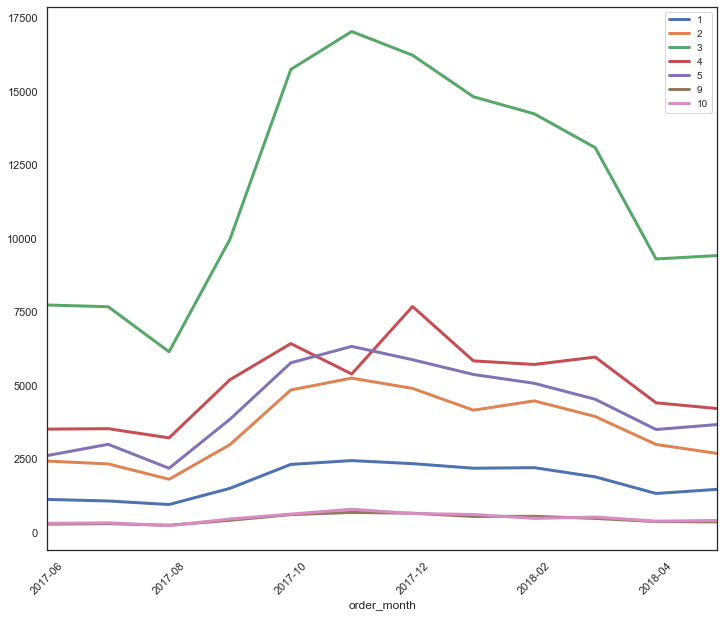

In [131]:
for source in sources:
    costs_df[costs_df['source_id'] == source].groupby('order_month')['costs'].sum().plot(figsize=(12,10), linewidth=3, rot=45)
plt.legend(sources, prop={'size':10})

Наглядно видно, что наибольшие расходы на рекламу пришлись на источник 3, наименьшие - на источники 10 и 9 (только в таком масштабе можно видеть разницу между расходами на эти источники). За исключением источников 4 и 2, в целом кривые рекламных расходов представляют собой одну и ту же линию, изгибы и перепады которой пропорциональны средним объемам расходов на источник. То есть были устоявшиеся пропорции, на которые делился по источникам рекламный бюджет каждый месяц.

In [132]:
costs_df[costs_df['source_id'] == 1]['costs'].sum()

20833.27

In [133]:
costs_df.head()

,source_id,date,costs,order_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [134]:
orders_df.head()

,day,Revenue,Uid,min_order_datetime,first_order_month,order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [135]:
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day,first_activity_date,active_month,first_active_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12,2017-51,2017-12-20,2017-12-20,2017-12,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02,2018-08,2018-02-19,2018-02-19,2018-02,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07,2017-26,2017-07-01,2017-07-01,2017-07,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05,2018-20,2018-05-20,2018-03-09,2018-05,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12,2017-52,2017-12-27,2017-12-27,2017-12,2017-12,0


In [136]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 13 columns):
Device                 359400 non-null object
End_session            359400 non-null datetime64[ns]
Source_id              359400 non-null int64
Start_session          359400 non-null datetime64[ns]
Uid                    359400 non-null uint64
duration               359400 non-null int64
month                  359400 non-null object
week                   359400 non-null object
day                    359400 non-null datetime64[ns]
first_activity_date    359400 non-null datetime64[ns]
active_month           359400 non-null object
first_active_month     359400 non-null object
lifetime               359400 non-null int32
dtypes: datetime64[ns](4), int32(1), int64(2), object(5), uint64(1)
memory usage: 34.3+ MB


In [137]:
visits_df['End_session'] = visits_df['End_session'].dt.strftime('%Y-%m-%d')
visits_df['Start_session'] = visits_df['Start_session'].dt.strftime('%Y-%m-%d')
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day,first_activity_date,active_month,first_active_month,lifetime
0,touch,2017-12-20,4,2017-12-20,16879256277535980062,1080,2017-12,2017-51,2017-12-20,2017-12-20,2017-12,2017-12,0
1,desktop,2018-02-19,2,2018-02-19,104060357244891740,1680,2018-02,2018-08,2018-02-19,2018-02-19,2018-02,2018-02,0
2,touch,2017-07-01,5,2017-07-01,7459035603376831527,0,2017-07,2017-26,2017-07-01,2017-07-01,2017-07,2017-07,0
3,desktop,2018-05-20,9,2018-05-20,16174680259334210214,1440,2018-05,2018-20,2018-05-20,2018-03-09,2018-05,2018-03,2
4,desktop,2017-12-27,3,2017-12-27,9969694820036681168,0,2017-12,2017-52,2017-12-27,2017-12-27,2017-12,2017-12,0


In [138]:
visits_df['End_session'] = pd.to_datetime(visits_df['End_session'])
visits_df['Start_session'] = pd.to_datetime(visits_df['Start_session'])
visits_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day,first_activity_date,active_month,first_active_month,lifetime
0,touch,2017-12-20,4,2017-12-20,16879256277535980062,1080,2017-12,2017-51,2017-12-20,2017-12-20,2017-12,2017-12,0
1,desktop,2018-02-19,2,2018-02-19,104060357244891740,1680,2018-02,2018-08,2018-02-19,2018-02-19,2018-02,2018-02,0
2,touch,2017-07-01,5,2017-07-01,7459035603376831527,0,2017-07,2017-26,2017-07-01,2017-07-01,2017-07,2017-07,0
3,desktop,2018-05-20,9,2018-05-20,16174680259334210214,1440,2018-05,2018-20,2018-05-20,2018-03-09,2018-05,2018-03,2
4,desktop,2017-12-27,3,2017-12-27,9969694820036681168,0,2017-12,2017-52,2017-12-27,2017-12-27,2017-12,2017-12,0


In [139]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 13 columns):
Device                 359400 non-null object
End_session            359400 non-null datetime64[ns]
Source_id              359400 non-null int64
Start_session          359400 non-null datetime64[ns]
Uid                    359400 non-null uint64
duration               359400 non-null int64
month                  359400 non-null object
week                   359400 non-null object
day                    359400 non-null datetime64[ns]
first_activity_date    359400 non-null datetime64[ns]
active_month           359400 non-null object
first_active_month     359400 non-null object
lifetime               359400 non-null int32
dtypes: datetime64[ns](4), int32(1), int64(2), object(5), uint64(1)
memory usage: 34.3+ MB


In [140]:
orders_df['first_order_month'] = orders_df['first_order_month'].dt.strftime('%Y-%m')
orders_df['order_month'] = orders_df['order_month'].dt.strftime('%Y-%m')
orders_df.head()

,day,Revenue,Uid,min_order_datetime,first_order_month,order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06,2017-06
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06,2017-06
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06,2017-06
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06,2017-06
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06,2017-06


In [141]:
big_orders = pd.merge(visits_df, orders_df, on=['Uid', 'day'])
big_orders.head()

,Device,End_session,Source_id,Start_session,Uid,duration,month,week,day,first_activity_date,active_month,first_active_month,lifetime,Revenue,min_order_datetime,first_order_month,order_month
0,touch,2018-02-12,2,2018-02-12,18188358787673499603,3960,2018-02,2018-07,2018-02-12,2018-02-10,2018-02,2018-02,0,0.73,2018-02-12,2018-02,2018-02
1,desktop,2018-03-12,3,2018-03-12,15857957287537270437,720,2018-03,2018-11,2018-03-12,2017-09-22,2018-03,2017-09,6,1.83,2018-03-12,2018-03,2018-03
2,touch,2018-03-27,5,2018-03-27,15868686231870595097,1200,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27,2018-03,2018-03
3,touch,2018-03-27,1,2018-03-27,15868686231870595097,60,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27,2018-03,2018-03
4,touch,2018-03-27,5,2018-03-27,15868686231870595097,1500,2018-03,2018-13,2018-03-27,2018-03-27,2018-03,2018-03,0,1.95,2018-03-27,2018-03,2018-03


In [142]:
big_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55028 entries, 0 to 55027
Data columns (total 17 columns):
Device                 55028 non-null object
End_session            55028 non-null datetime64[ns]
Source_id              55028 non-null int64
Start_session          55028 non-null datetime64[ns]
Uid                    55028 non-null uint64
duration               55028 non-null int64
month                  55028 non-null object
week                   55028 non-null object
day                    55028 non-null datetime64[ns]
first_activity_date    55028 non-null datetime64[ns]
active_month           55028 non-null object
first_active_month     55028 non-null object
lifetime               55028 non-null int32
Revenue                55028 non-null float64
min_order_datetime     55028 non-null datetime64[ns]
first_order_month      55028 non-null object
order_month            55028 non-null object
dtypes: datetime64[ns](5), float64(1), int32(1), int64(2), object(7), uint64(1)
memory u

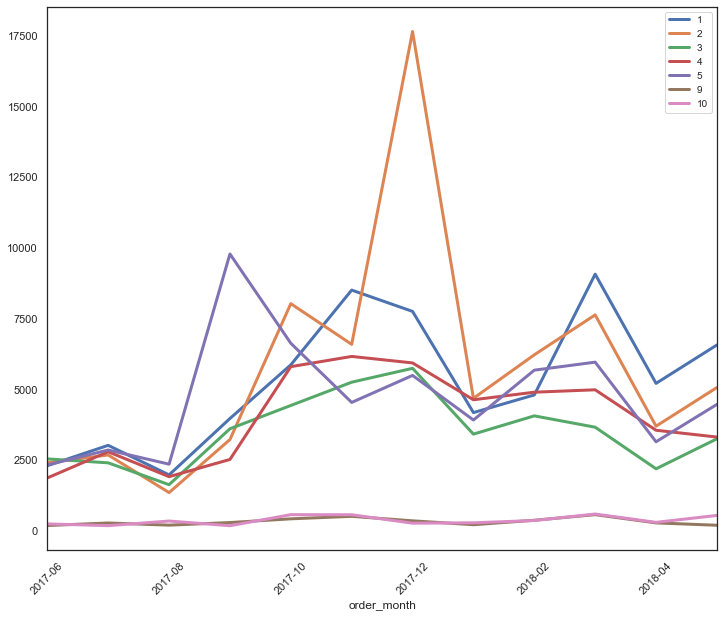

In [143]:
for source in sources:
    big_orders[big_orders['Source_id'] == source].groupby('order_month')['Revenue'].sum().plot(figsize=(12,10), linewidth=3, rot=45)
plt.legend(sources, prop={'size':10})

Вот и ответ, почему так замечательно окупаются 9 и 10 источник - просто в них так мало вложено, что окупаться нечему. Источник 3 приносит меньше доходов, чем остальные (кроме 9 и 10), а потрачено на него больше всех. Более того, выручка с него стремится к снижению. Судя по графикам, обе крупные покупки сентябрьской когорты в декабре пришли из источника 2, который начиная с октября приносит уверенно высокую выручку. Также по соотношению очень здорово выглядит источник 1.

In [144]:
big_orders_df = big_orders[['Device', 'End_session', 'Source_id', 'Start_session', 'Uid', 'duration', 'day', 'Revenue']]
big_orders_df.head()

,Device,End_session,Source_id,Start_session,Uid,duration,day,Revenue
0,touch,2018-02-12,2,2018-02-12,18188358787673499603,3960,2018-02-12,0.73
1,desktop,2018-03-12,3,2018-03-12,15857957287537270437,720,2018-03-12,1.83
2,touch,2018-03-27,5,2018-03-27,15868686231870595097,1200,2018-03-27,1.95
3,touch,2018-03-27,1,2018-03-27,15868686231870595097,60,2018-03-27,1.95
4,touch,2018-03-27,5,2018-03-27,15868686231870595097,1500,2018-03-27,1.95


In [145]:
big_orders_df['month_of_order'] = big_orders_df['day'].astype('datetime64[M]')
big_orders_df.head()

C:\Users\Asencour\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Device,End_session,Source_id,Start_session,Uid,duration,day,Revenue,month_of_order
0,touch,2018-02-12,2,2018-02-12,18188358787673499603,3960,2018-02-12,0.73,2018-02-01
1,desktop,2018-03-12,3,2018-03-12,15857957287537270437,720,2018-03-12,1.83,2018-03-01
2,touch,2018-03-27,5,2018-03-27,15868686231870595097,1200,2018-03-27,1.95,2018-03-01
3,touch,2018-03-27,1,2018-03-27,15868686231870595097,60,2018-03-27,1.95,2018-03-01
4,touch,2018-03-27,5,2018-03-27,15868686231870595097,1500,2018-03-27,1.95,2018-03-01


In [146]:
costs_df['month_of_order'] = costs_df['date'].astype('datetime64[M]')
costs_df.head()

,source_id,date,costs,order_month,month_of_order
0,1,2017-06-01,75.20,2017-06,2017-06-01
1,1,2017-06-02,62.25,2017-06,2017-06-01
2,1,2017-06-03,36.53,2017-06,2017-06-01
3,1,2017-06-04,55.00,2017-06,2017-06-01
4,1,2017-06-05,57.08,2017-06,2017-06-01


In [149]:
def romi_per_source(source):
    print('Код источника:', source)
    orders = big_orders_df[big_orders_df['Source_id'] == source].reset_index()
    costs = costs_df[costs_df['source_id'] == source].reset_index()
    first_orders = orders.groupby('Uid').agg({'month_of_order': 'min'}).reset_index()
    first_orders.columns = ['Uid', 'first_month_of_order']
    #print(first_orders.info())
    #first_orders['first_month_of_order'] = pd.to_datetime(first_orders['first_month_of_order'])
    cohorts_sizes = first_orders.groupby('first_month_of_order').agg({'Uid': 'nunique'}).reset_index()
    cohorts_sizes.columns = ['first_month_of_order', 'n_buyers']
    #print(cohorts_sizes)
    orders_merge = pd.merge(orders,first_orders, on='Uid')
    cohorts = orders_merge.groupby(['first_month_of_order','month_of_order']).agg({'Revenue': 'sum'}).reset_index()
    #print(cohorts)
    report = pd.merge(cohorts_sizes, cohorts, on='first_month_of_order')
    report['age'] = (report['month_of_order'] - report['first_month_of_order']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['Revenue'] / report['n_buyers']
    #print(report)
    output = report.pivot_table(
        index='first_month_of_order', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round()
    
    #print(output.fillna(''))
    monthly_costs = costs.groupby('month_of_order').sum()
    report_cac = pd.merge(report, monthly_costs, left_on='first_month_of_order', right_on='month_of_order')
    report_cac['cac'] = report_cac['costs'] / report_cac['n_buyers']
    report_cac['romi'] = report_cac['ltv'] / report_cac['cac']
    report_cac['first_month_of_order'] = report_cac['first_month_of_order'].dt.strftime('%Y-%m')
    output = report_cac.pivot_table(
        index='first_month_of_order', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
    #print(output.cumsum(axis=1).round(2).fillna(''))
    output_heatmap = output.cumsum(axis=1).round(2)
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('Накопительный ROMI источника')
    sns.heatmap(output_heatmap, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    print(output.cumsum(axis=1).mean(axis=0))

Код источника: 1


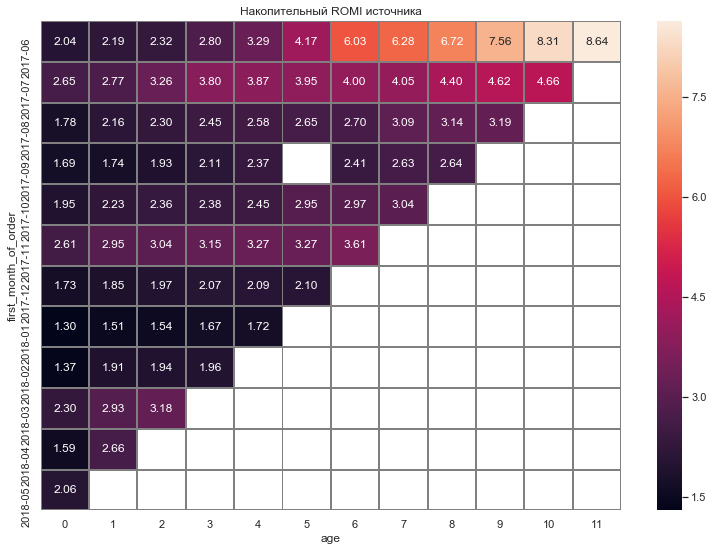

age
0     1.922543
1     2.263118
2     2.382354
3     2.487964
4     2.703529
5     3.183299
6     3.618826
7     3.817638
8     4.225199
9     5.123104
10    6.485960
11    8.642994
dtype: float64
Код источника: 2


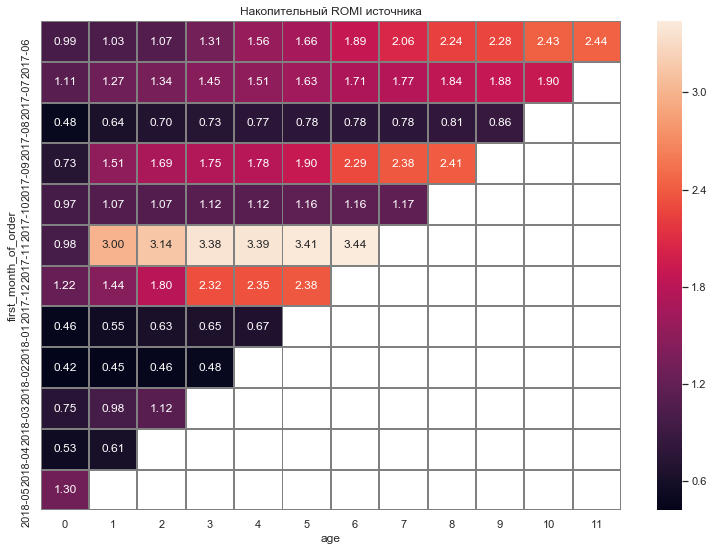

age
0     0.827563
1     1.140823
2     1.301722
3     1.465517
4     1.642605
5     1.845389
6     1.878301
7     1.632338
8     1.826540
9     1.673357
10    2.166405
11    2.443013
dtype: float64
Код источника: 3


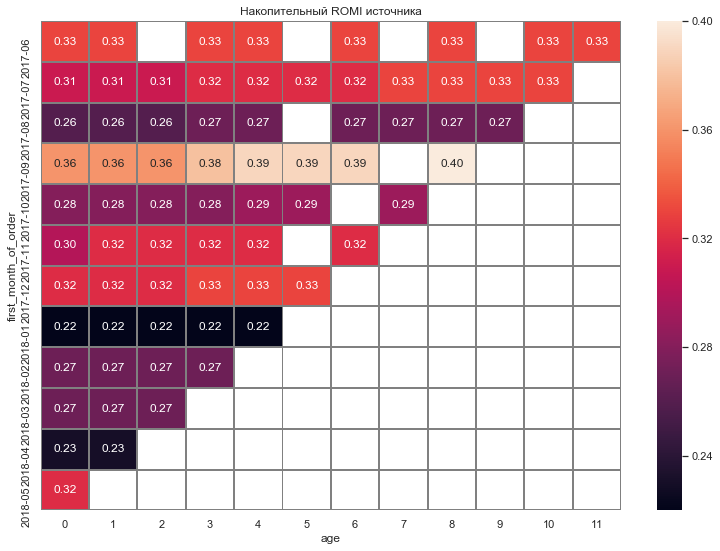

age
0     0.289732
1     0.289715
2     0.292576
3     0.302581
4     0.308703
5     0.330904
6     0.328131
7     0.296305
8     0.333846
9     0.301104
10    0.331391
11    0.333268
dtype: float64
Код источника: 4


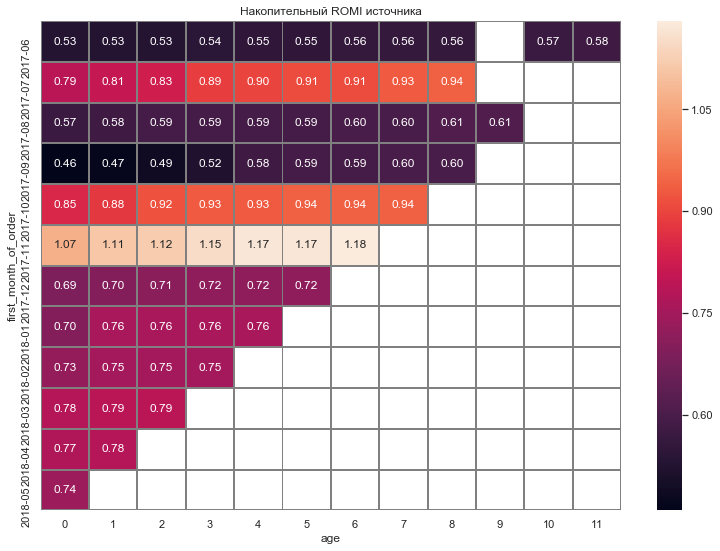

age
0     0.724007
1     0.741131
2     0.748239
3     0.760232
4     0.775558
5     0.782968
6     0.796930
7     0.726289
8     0.674738
9     0.606233
10    0.569611
11    0.581347
dtype: float64
Код источника: 5


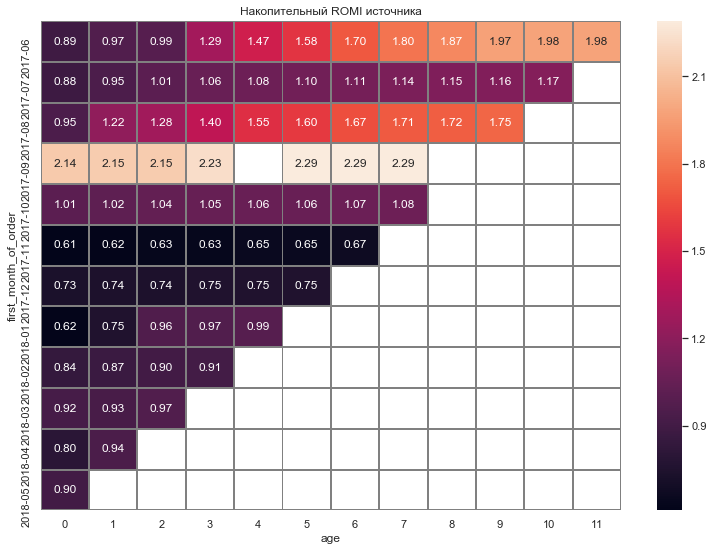

age
0     0.941753
1     1.013249
2     1.068559
3     1.143246
4     1.077238
5     1.290352
6     1.416811
7     1.603928
8     1.581108
9     1.625794
10    1.574727
11    1.980253
dtype: float64
Код источника: 9


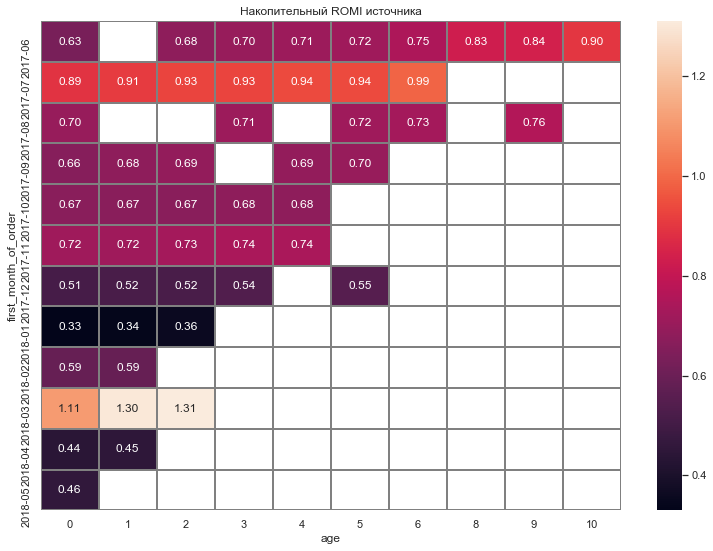

age
0     0.642859
1     0.687231
2     0.735221
3     0.716525
4     0.750777
5     0.726361
6     0.820104
8     0.829851
9     0.799721
10    0.900533
dtype: float64
Код источника: 10


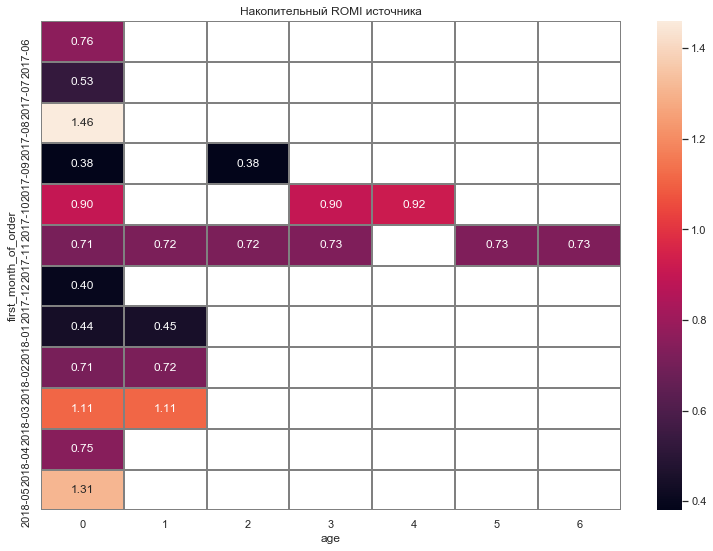

age
0    0.787551
1    0.747232
2    0.549352
3    0.816399
4    0.916156
5    0.730375
6    0.732685
dtype: float64


In [150]:
for source in sources:
    romi_per_source(source)

- Источник 1 окупается в первый же месяц, сразу же. За исключением январской и февральской когорт к 3-4 месяцу ROMI уже больше двух. У самой первой когорты расходы на рекламу уже окупились в 8 раз, у остальных окупаемость на уровне трехкратного превышения.
- Источник 2 окупается в среднем на второй месяц и к 10 месяцу окупаемость становится двукратной. Неплохо, учитывая, что расходы на него невелики. Впрочем, расходы на источник 1 существенно меньше, а значит, он эффективнее.
- А вот источник 3 не окупается совсем. Это видно и при сопоставлении графиков расходов на этот источник и выручки с него. Затраты на него наибольшие из всех, а эффект мизерный. Следовательно, либо нужно менять настройки кампании, либо отказываться от этого источника.
- Схожая беда с источниками 4, 9 и 10. Однако ноябрьская когорта по четвертому источнику окупилась в первый же месяц. Значит, что-то не так с настройками - нужно изучить, чем отличалась эта когорта в настройках, поскольку расходы в этот месяц на источник 4 были совсем не запредельными.
- Источники 9 и 10 не только скверно окупаются, но и отличаются крайней нестабильностью - к примеру, в 10 источнике только ноябрьская когорта продержалась хотя бы полгода. Со временем показатели источника растут - последние три когорты либо окупились в первый же месяц, либо близки к этому. Значит, коллеги на верном пути в поиске нужных настроек. У источника 9 нужно изучить параметры мартовской когорты - она единственная окупилась.
- Источник 5 ведет себя примерно как источник 2: тоже окупается на второй месяц, но до двукратной окупаемости не дотянул. 

### Выводы

- Стоит обратить внимание на исходные данные по дню 10.12.17 - в этот день два пользователя из сентябрьской когорты совершили большие покупки на сайте, одна из которых стала крупнейшей, вторая вошла в топ-5. Интересно, что они купили, с чем это связано;
- Возможно, это стало следствием крупнейшего транша на рекламу, который произошел 24.11.17 (львиная его доля пришлась на источник 3, как, впрочем, и в любой другой месяц. Расходы на источник 2, из которого и пришли эти покупатели-рекордсмены, тоже были выше всего именно в ноябре);
- С июня по сентябрь 2017 года сервисом ежемесячно пользовалось не более 20 000 уникальных пользователей (но и не менее 10 000). Затем с октября 2017 по март 2018 включительно это число резко выросло и приблизилось к 30 000;
- Самые высокие траты на рекламу наблюдались в ноябре и декабре 2017 года, самые низкие - в августе 2017 года. Это способствовало формированию самой малочисленной когорты, которая совершила меньше всего покупок в первый месяц существования;
- Вышесказанное позволяет сделать вывод, что рост расходов на рекламу приводит к росту посетителей. Это было подтверждено расчетами: выявили ярко выраженную зависимость между суммами расходов на рекламу, количеством привлеченных пользователей и суммами покупок в каждом месяце, кроме ноября 2017 и января 2018;
- Средняя сессия на сайте длится 643 с, или чуть больше 10 минут. Мода - всего минута вместо 10. Самая длинная сессия длилась 84 480 с, почти сутки (кто-то открыл вкладку и забыл закрыть?). Медиана составила 300 с, или 6 минут. Учитывая стабильность пусть и небольшого, но "шлейфа" постоянных покупателей в каждой когорте, это может означать, что пользователям в целом не составляет труда найти на сайте все необходимое для совершения заказа;
- В среднем один пользователь заходит на сайт раз в день;
- Каждый месяц на сайт приходит свыше 10 000 новых пользователей, в половине случаев - свыше 20 000. Уже на второй месяц из них на сайт возвращается минимум в 10 раз меньше пользователей. Все когорты демонстрируют тенденцию к уверенному дальнейшему снижению числа пользователей, причем чем больше их было изначально, тем стремительнее падение - и от когорт с изначальным числом пользователей 10-20 000, и от когорт с изначальным числом пользователей 20-27 000 спустя считанные месяцы остается порядка 500 человек. Самая скорбная когорта - за август 2017 года; самая малочисленная изначально (10 181 человек), она стабильно снижалась на всем протяжении рассматриваемого периода и сократилась до 265 человек - антирекорд по обоим показателям. Самая же изначально многочисленная когорта возникла в ноябре 2017 (это объяснимо высокими затратами на маркетинг - за октябрь и ноябрь 4 транша попало в топ-10 за весь период). Эта когорта собрала 27 248 человек, из которых полгода спустя осталось 594, что даже меньше, чем июньской когорте;
- В первый же месяц каждая когорта теряет минимум 90% пользователей. Спустя полгода их остается в лучшем случае 6%, причем начиная с lifetime=4 Retention Rate снижается с каждой новой когортой. В итоге от изначального набора пользователей остается около 2%. Кроме того, с каждой новой когортой в первый же месяц теряется все больше пользователей (только в августе-сентябре наблюдался скромный рост);
- В среднем 127 человек в день делают покупки на сайте на сумму в среднем в 61 р;
- Подавляющее большинство покупателей делают первый заказ в первый же день активности на сайте, небольшая доля откладывает первую покупку на день-два, и крайне редко время до первой покупки тянется дольше;
- Для всех когорт подтверждена общая тенденция, выявленная выше: основной объем покупок приходится на первый месяц и даже первую неделю жизни когорты. Это соответствует и Retention Rate по числу пользователей: каждый месяц на сайт приходит 20-25 тысяч новых юзеров, из них 2000 - 3500 делают покупки в первые два-три дня, а потом большинство из них уходит (кстати, интересно, куда - может быть, в приложение или подписываются на соцсети и делают дальнейшие покупки там). Менее 10 % из каждой когорты остаются постоянными посетителями и покупателями на сайте;
- Только в двух когортах более 10% от изначального числа сделавших покупки пользователей что-то купили на второй месяц lifetime. Только в одной - самой первой - на всем протяжении lifetime доля продолжающих делать покупки юзеров достаточно стабильно держится на уровне выше 5% от изначального числа. В целом же очень быстро эта доля падает до двух процентов - и чем дальше, тем быстрее;
- В среднем ежедневно совершается 105 покупок, еженедельно - 685, ежемесячно - 2906. Средняя сумма покупок за день - 54 р, за неделю - 153 р, за месяц - 311 р. Средний чек за покупку на сайте - 5 рублей;
- С течением времени падает как число пользователей, так и число совершенных ими покупок (особенно чувствительны эти падения в первый же месяц активности), но зато пользователи, оставшиеся активными, постепенно средний чек увеличивают;
- Разбивка по рекламным источникам: больше всего - 141 321 р - было потрачено на источник 3. Меньше всего - на источники 9 и 10;
- Средняя стоимость привлечения одного покупателя безотносительно к источнику за рассматриваемый период составила 10.33 р;
- Дороже всего новые покупатели обходились в августе 2017, а также январе и апреле 2018. Майская когорта охотнее других вовлеклась в процесс покупок;
- Наилучшим образом себя проявляют рекламные источники 1, 2 и 5 - это топ-3 по убыванию окупаемости. Первый окупается в первый же месяц, еще спустя пару месяцев окупается двукратно и в целом позволяет рассчитывать на трехкратную окупаемость к 10-му месяцу. Второй и пятый окупаются на второй месяц, но источник 2 окупается двукратно в течение года, а источник 5 не добирается до этого уровня;
- Источник 3 - абсолютный аутсайдер по ROMI и возвращает в лучшем случае треть от потраченного. При этом расходы на него с отрывом наибольшие среди всех источников, что говорит о неэффективности настроек рекламной кампании;
- Источники 9 и 10 не так безнадежны: несмотря на то что в среднем они тоже не окупаются, в них есть когорты с положительным балансом. Их нужно изучить - есть вероятность, что их настройки помогут улучшить показатели окупаемости этих источников;
- Таким образом, можно смело рекомендовать в работу источники 1,2 и 5. Источники 3 и 4 требуют изучения на уровне глобальных настроек рекламных кампаний, источники 9 и 10 требуют изучения успешных (окупившихся) когорт.